# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [ ]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [ ]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

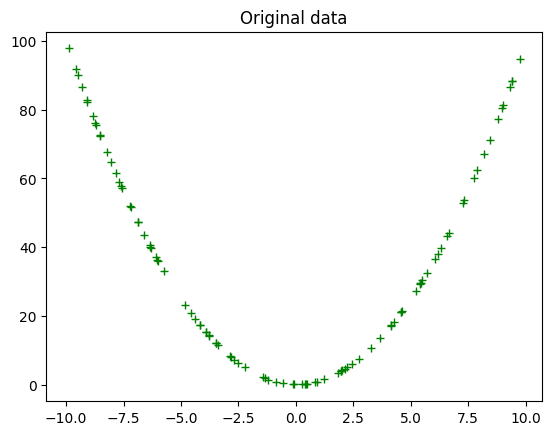

In [ ]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [ ]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [ ]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

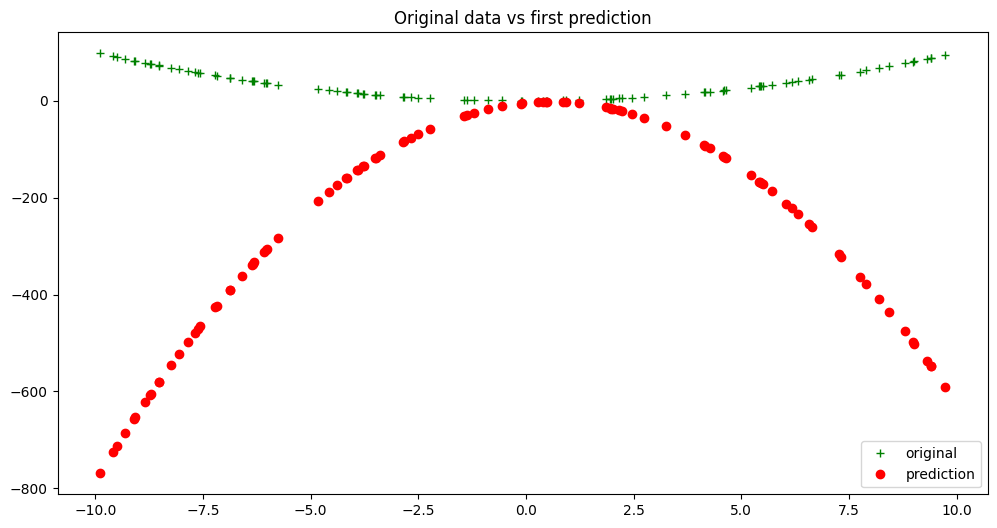

In [ ]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [ ]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [ ]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


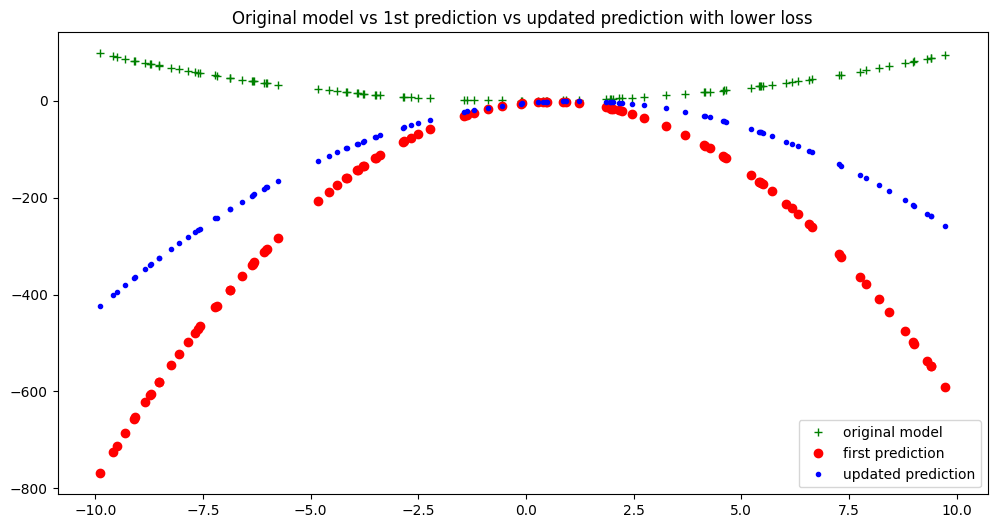

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [ ]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [ ]:
def gradient_descent(epochs, lr):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [ ]:
GD = gradient_descent(30000, 0.0003)


[13475.624637116503, 2869.715432846906, 1958.273415665309, 1815.4133533665963, 1736.1622571518062, 1664.7307185029726, 1596.5981613153112, 1531.2972754982177, 1468.6853640008349, 1408.6497165327594, 1351.0841647769712, 1295.8870592843532, 1242.960945034913, 1192.2123779132319, 1143.5517588087196, 1096.8931753375862, 1052.154250140267, 1009.2559954258945, 968.1226735021916, 928.6816630441622, 890.8633308653946, 854.6009089655777, 819.8303766371265, 786.4903474227408, 754.5219607243141, 723.8687778717832, 694.476682468427, 666.2937848366366, 639.2703303954412, 613.3586118080115, 588.5128847440168, 564.6892871080927, 541.8457615918065, 519.9419814123638, 498.9392791069297, 478.8005782568453, 459.49032802117404, 440.9744403639862, 423.2202298645435, 406.1963560041051, 389.8727678274495, 374.22065088139925, 359.2123763366603, 344.8214522031347, 331.0224765525732, 317.7910926659628, 305.1039460264636, 292.9386430819466, 281.27371170432554, 270.0885632758611, 259.3634563354952, 249.0794617210

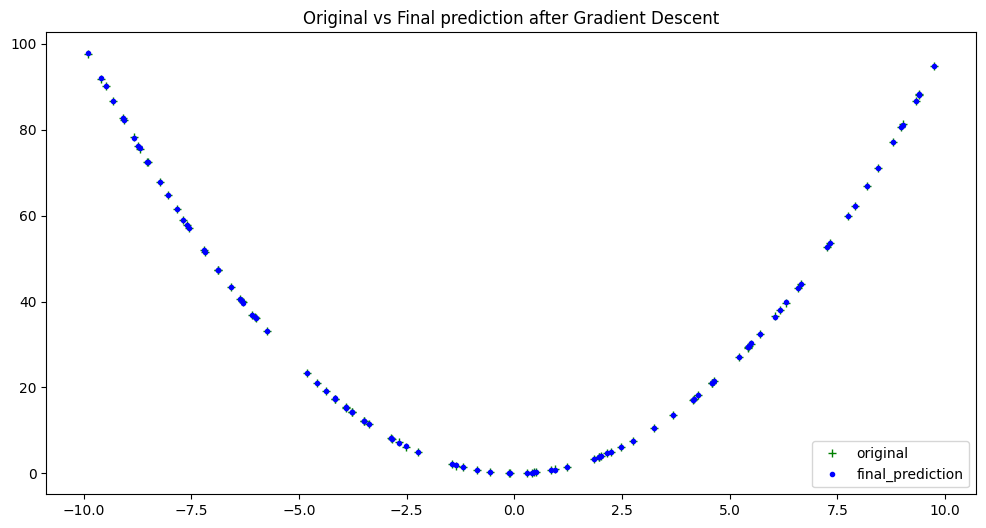

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [ ]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (0.9999579417260247, -0.002867610798230069, -0.012778521556486263)
Original Coefficients: [1, 0, 0]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


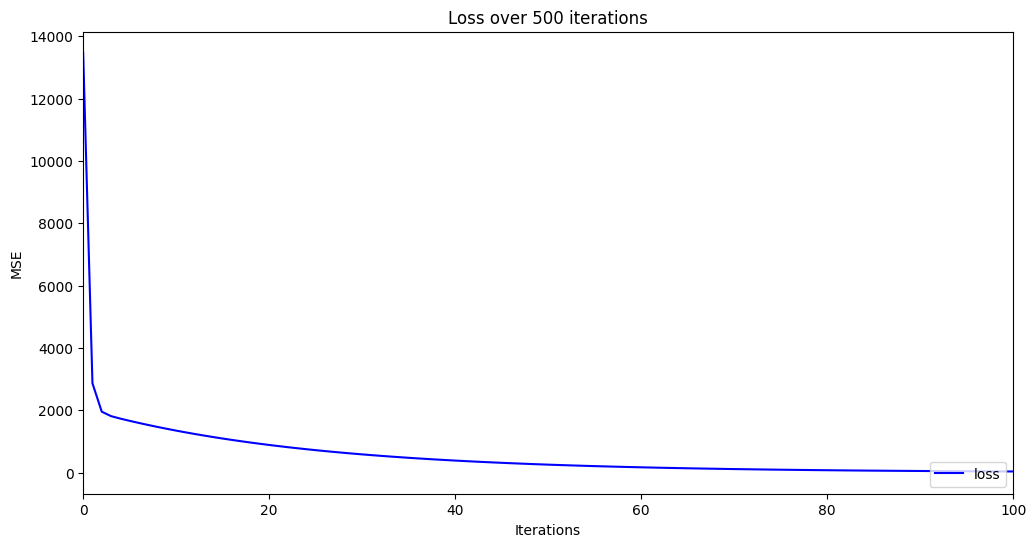

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



**1)**

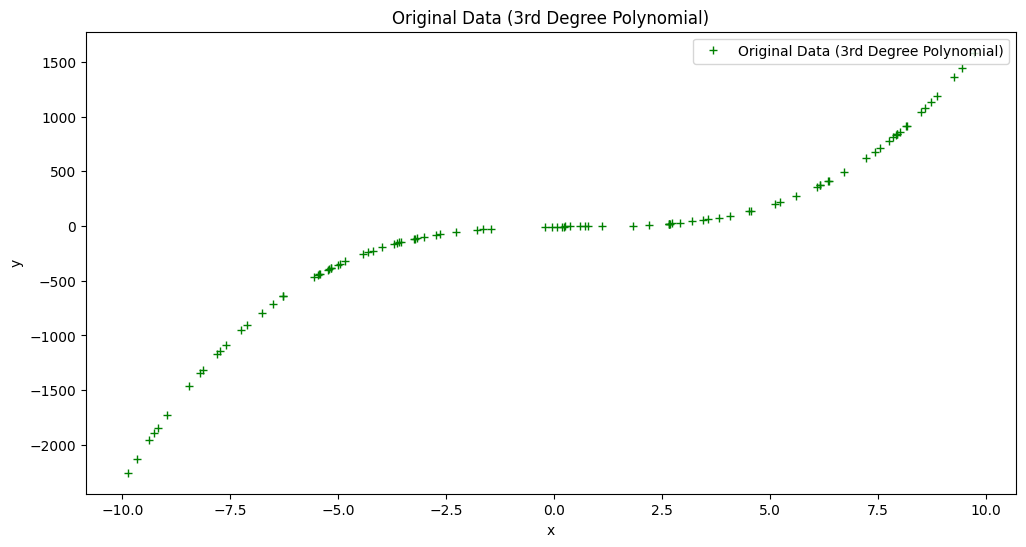

[622543.5462659836, 595402.3120468378, 574611.8486812577, 554831.9999773372, 535856.2912464683, 517646.8579522758, 500172.587393038, 483403.7931922264, 467311.99304537504, 451869.85474187357, 437051.1495574667, 422830.70769761637, 409184.37554525887, 396088.9746347711, 383522.26228228403, 371462.89380546496, 359890.3862685952, 348785.0836913647, 338128.12366228784, 327901.40530003427, 318087.5585082498, 308669.91447165346, 299632.4773432879, 290959.8970748428, 282637.443343892, 274650.98053376627, 266986.94372355996, 259632.3156474915, 252574.60458447944, 245801.82314038306, 239302.46788686275, 233065.49982227953, 227080.3256214455, 221336.77964237402, 215825.10665947257, 210535.945293843, 205460.3121125513, 200589.58636985454, 195915.49536446988, 191430.10038801032, 187125.7832407269, 182995.23329164524, 179031.43506112494, 175227.65630474486, 171577.43657827834, 168074.5762643317, 164713.12604201044, 161487.37678172466, 158391.84984797094, 155421.28779361877, 152570.64542989564, 1498

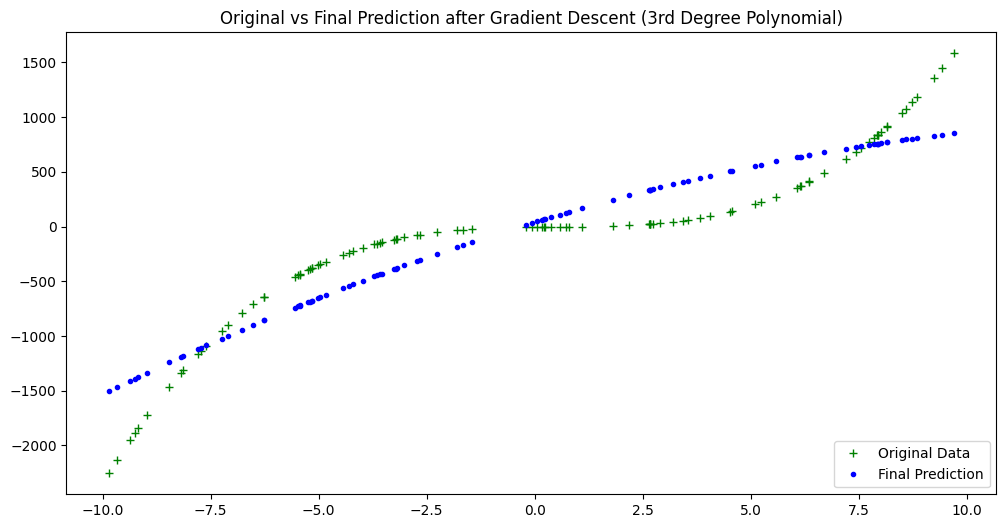

Original Coefficients: [2, -3, 4, -5]
Predicted Coefficients: (-3.7155706726566513, 119.84895837372031, 40.634953692922196)


In [ ]:
def eval_3rd_degree(coeffs, x):
    """
    Function to evaluate a 3rd degree polynomial.
    y = a*x^3 + b*x^2 + c*x + d

    Args:
        coeffs: List containing the coefficients [a, b, c, d] for the cubic polynomial.
        x: The input value.

    Returns:
        y: The polynomial evaluation result.
    """
    return coeffs[0] * (x ** 3) + coeffs[1] * (x ** 2) + coeffs[2] * x + coeffs[3]

# New coefficients for a 3rd degree polynomial
coeffs = [2, -3, 4, -5]

# Generate data based on this new polynomial
hundred_xs = np.random.uniform(-10, 10, 100)
xs = []
ys = []

for x in hundred_xs:
    y = eval_3rd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original Data (3rd Degree Polynomial)')
plt.title('Original Data (3rd Degree Polynomial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right")
plt.show()

# Run Gradient Descent on this new polynomial
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))  # Random initial guesses for a, b, c, d

GD = gradient_descent(30000, 0.0003)  # Running gradient descent with the new data and polynomial

# Plot the final prediction vs. the original data
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original Data')
plt.plot(xs, GD[2], 'b.', label='Final Prediction')
plt.title('Original vs Final Prediction after Gradient Descent (3rd Degree Polynomial)')
plt.legend(loc="lower right")
plt.show()

# Print the original vs predicted coefficients
print(f"Original Coefficients: {coeffs}")
print(f"Predicted Coefficients: {GD[1]}")

**2)**

Running gradient descent with learning rate: 0.0001
[697687.5720725022, 648469.4898513757, 625782.6656657543, 612917.0032736782, 603725.1407993085, 595945.0472781102, 588743.8549021246, 581814.3999556283, 575042.9008428592, 568386.7190385277, 561829.3954171881, 555364.1109988262, 548987.6031272686, 542697.9275010102, 536493.6348363708, 530373.4678806118, 524336.2498286581, 518380.8431461543, 512506.1342920825, 506711.02796985896, 500994.44488507294, 495355.3207948149, 489792.60603379295, 484305.2652175157, 478892.2770122668, 473552.63393128087, 468285.3421421737, 463089.42128010833, 457963.90426464105, 452907.8371194697, 447920.27879478125, 443000.300992065, 438146.987991319, 433359.43648060487, 428636.75538791774, 423978.06571533275, 419382.50037540094, 414849.2040297612, 410377.33292993886, 405966.054760303, 401614.5484831499, 397322.0041858869, 393087.6229302865, 388910.61660378287, 384790.2077727831, 380725.62953796744, 376716.12539154815, 372760.9490764646, 368859.36444748426, 365

<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in scalar add
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-6-3e15a3826a00>:12: RuntimeWarning: overflow encountered in multiply
  return sum((ys - y_bar) * (ys - y_bar)) / len(ys)
<ipython-input-12-bad7532be911>:32: RuntimeWarning: overflow encountered in scalar add
  gradient_a = (-2 / n) * sum(a_s)
<ipython-input-12-bad7532be911>:33: RuntimeWarning: invalid value encountered in scalar add
  gradient_b = (-2 / n) * sum(b_s)
<ipython-input-12-bad7532be911>:37: RuntimeWarning: invalid value encountered in scalar subtract
  a_new = coeffs[0] - lr * gradient_a


[21428619.637014788, 2451255529.2476664, 286156039254.83966, 33409580900703.125, 3900672403427997.0, 4.554156282989819e+17, 5.317119026045294e+19, 6.207901745211915e+21, 7.247918259762653e+23, 8.462169869347325e+25, 9.879846368470865e+27, 1.1535027749580698e+30, 1.3467503463233553e+32, 1.5723728929806882e+34, 1.8357942296655232e+36, 2.1433468286804317e+38, 2.502424048283158e+40, 2.921657864061695e+42, 3.4111263758394186e+44, 3.982596078437221e+46, 4.649804720319226e+48, 5.428791549854323e+50, 6.338282888092201e+52, 7.400142296964866e+54, 8.639896164655357e+56, 1.0087347342853483e+59, 1.1777291587326867e+61, 1.3750354024558058e+63, 1.605396575254483e+65, 1.8743504052592267e+67, 2.1883623622023263e+69, 2.5549810829749437e+71, 2.9830198357964076e+73, 3.4827683852726524e+75, 4.066240351437795e+77, 4.747462009124255e+79, 5.542809470204753e+81, 6.471402354341071e+83, 7.555563411820491e+85, 8.821355147504679e+87, 1.029920634597092e+90, 1.2024643559090011e+92, 1.403914514051171e+94, 1.63911383

<ipython-input-12-bad7532be911>:22: RuntimeWarning: overflow encountered in scalar multiply
  partial_a = x_squared * (y - y_bar)


[27719617677.003006, 4267668021914335.5, 6.574871043647382e+20, 1.0129404480763947e+26, 1.5605604194677235e+31, 2.4042369197854608e+36, 3.7040252298793085e+41, 5.706510365378931e+46, 8.791587132693027e+51, 1.354453060852383e+57, 2.0867029654182993e+62, 3.214824781853467e+67, 4.9528363879750536e+72, 7.63045887431132e+77, 1.1755668484006019e+83, 1.811106563605255e+88, 2.7902343360539055e+93, 4.298702134123057e+98, 6.622683908351535e+103, 1.020306613053707e+109, 1.5719089104167279e+114, 2.4217206779168868e+119, 3.730961128209029e+124, 5.748008458258929e+129, 8.85552009277462e+134, 1.3643027264662126e+140, 2.1018775971857667e+145, 3.238203184563395e+150, 4.988853717531569e+155, 7.685948038583084e+160, 1.184115642521349e+166, 1.824277041459457e+171, 2.810525091037356e+176, 4.3299625593222096e+181, 6.670844471348273e+186, 1.027726345233886e+192, 1.5833399282869577e+197, 2.4393315790082445e+202, 3.758092906041104e+207, 5.78980832781191e+212, 8.91991797725753e+217, 1.3742240194516336e+223, 2.1

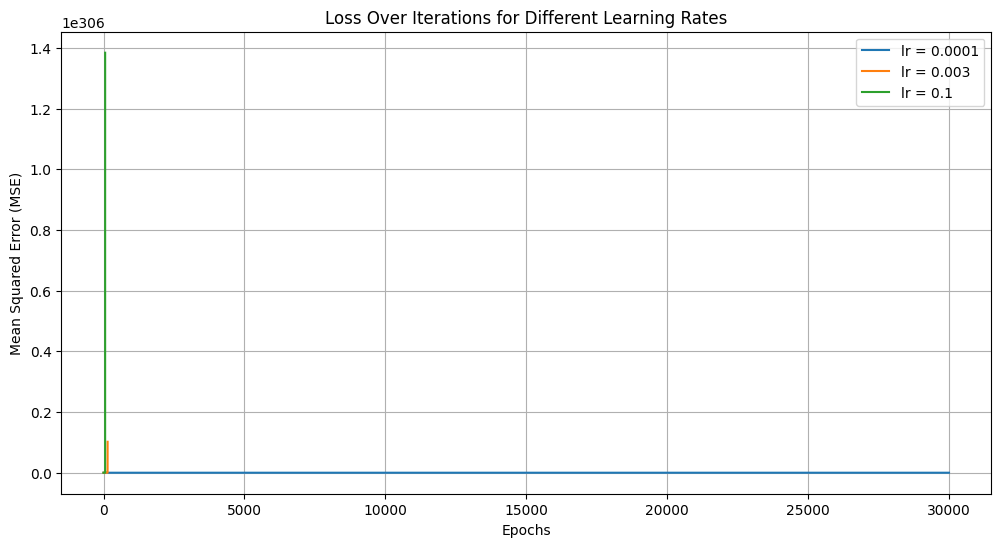

In [ ]:
# Test different learning rates
learning_rates = [0.0001, 0.003, 0.1]  # Small, medium, and large learning rates

# Initialize a figure to plot the results for different learning rates
plt.figure(figsize=(12, 6))

# Loop over different learning rates and run gradient descent for each
for lr in learning_rates:
    print(f"Running gradient descent with learning rate: {lr}")
    GD_result = gradient_descent(30000, lr)  # Run gradient descent for each learning rate
    plt.plot(GD_result[3], label=f'lr = {lr}')  # Plot the loss over iterations for this learning rate

# Adding plot details
plt.title('Loss Over Iterations for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend(loc="upper right")
plt.grid(True)  # Add grid for better readability
plt.show()

**3)**

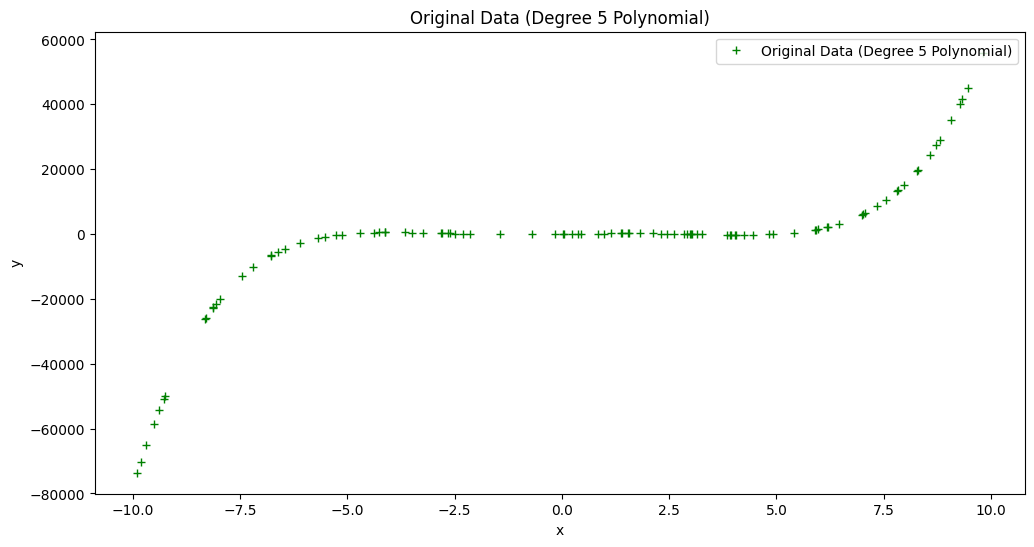

Running gradient descent with initial coefficients: [-0.904236695641977, -3.8721349470498563, -1.8587537029693184, 9.665007737036163, -7.1060049794535995, -5.488342231575212]
[411082062.3719393, 400124423.3177256, 390540999.92158747, 381408544.0705105, 372651308.1688068, 364250241.8832896, 356190618.54990417, 348458544.9745625, 341040708.148847, 333924337.1462147, 327097180.12982553, 320547483.19263935, 314263970.11690134, 308235822.96015626, 302452663.4305238, 296904535.01891685, 291581885.8574217, 286475552.2743296, 281576743.01750696, 276877024.1189386, 272368304.374393, 268042821.41320217, 263893128.33418313, 259912080.8846806, 256092825.16067123, 252428785.80674133, 248913654.69562978, 245541380.0678441, 242306156.11265197, 239202412.97250974, 236224807.15371978, 233368212.32680747, 230627710.50077906, 227998583.55606383, 225476305.12156737, 223056532.7818454, 220735100.60098794, 218508011.95033637, 216371432.62769124, 214321684.25615883, 212355237.95127544, 210468708.24550638, 20

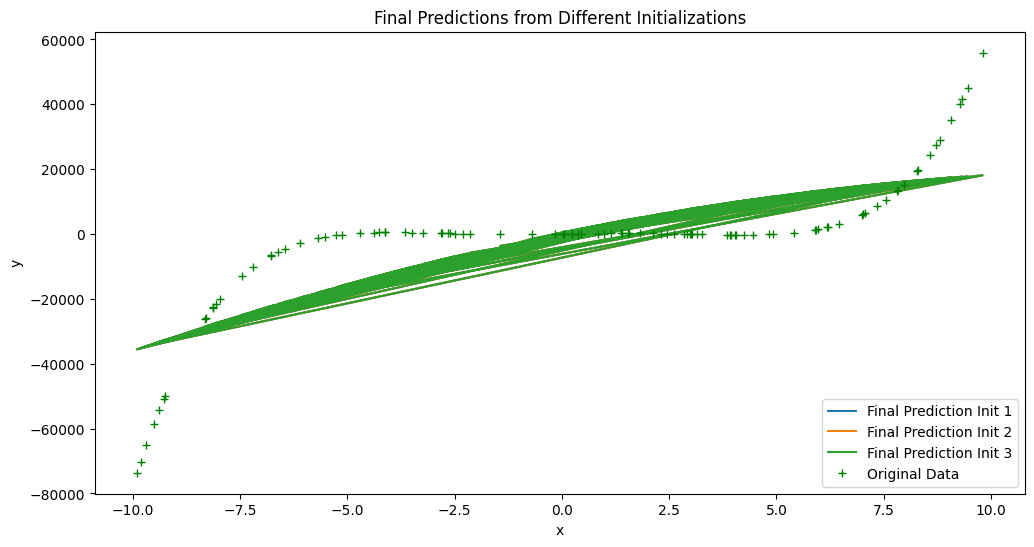

Final coefficients from initialization 1: (-93.05429663397098, 2714.520350589082, 433.56522532155907)
Final coefficients from initialization 2: (-93.05429663397098, 2714.520350589082, 433.56522532155907)
Final coefficients from initialization 3: (-93.05429663397098, 2714.520350589082, 433.56522532155907)


In [ ]:
# Define a 5th-degree polynomial with 5 roots
def eval_5th_degree(coeffs, x):
    """
    Function to evaluate a 5th-degree polynomial.
    y = a*x^5 + b*x^4 + c*x^3 + d*x^2 + e*x + f

    Args:
        coeffs: List containing the coefficients [a, b, c, d, e, f].
        x: The input value.

    Returns:
        y: The polynomial evaluation result.
    """
    return sum([coeffs[i] * (x ** (5 - i)) for i in range(6)])

# Define the 5 roots (e.g., -5, -2, 0, 3, 5) and build the polynomial equation
roots = [-5, -2, 0, 3, 5]
coeffs = np.poly(roots)  # This will generate the coefficients for the polynomial

# Generate data based on this polynomial
hundred_xs = np.random.uniform(-10, 10, 100)
xs = []
ys = []

for x in hundred_xs:
    y = eval_5th_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

# Visualize the original data generated by the degree 5 polynomial
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original Data (Degree 5 Polynomial)')
plt.title('Original Data (Degree 5 Polynomial)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right")
plt.show()

# Try different initializations for gradient descent
initializations = [
    [random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10), random.uniform(-10, 10)],
    [0, 0, 0, 0, 0, 0],
    [1, -1, 1, -1, 1, -1]
]

# Run gradient descent with different initializations
results = []

for init in initializations:
    print(f"Running gradient descent with initial coefficients: {init}")
    GD_result = gradient_descent(30000, 0.0003)  # Run gradient descent for each initialization
    results.append(GD_result)

# Visualizing the final prediction from all initializations
plt.figure(figsize=(12, 6))

for i, result in enumerate(results):
    plt.plot(xs, result[2], label=f'Final Prediction Init {i+1}')

plt.plot(xs, ys, 'g+', label='Original Data')
plt.title('Final Predictions from Different Initializations')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.show()

# Compare final coefficients
for i, result in enumerate(results):
    print(f"Final coefficients from initialization {i+1}: {result[1]}")

**4)**

[411082062.3719393, 400124423.3177256, 390540999.92158747, 381408544.0705105, 372651308.1688068, 364250241.8832896, 356190618.54990417, 348458544.9745625, 341040708.148847, 333924337.1462147, 327097180.12982553, 320547483.19263935, 314263970.11690134, 308235822.96015626, 302452663.4305238, 296904535.01891685, 291581885.8574217, 286475552.2743296, 281576743.01750696, 276877024.1189386, 272368304.374393, 268042821.41320217, 263893128.33418313, 259912080.8846806, 256092825.16067123, 252428785.80674133, 248913654.69562978, 245541380.0678441, 242306156.11265197, 239202412.97250974, 236224807.15371978, 233368212.32680747, 230627710.50077906, 227998583.55606383, 225476305.12156737, 223056532.7818454, 220735100.60098794, 218508011.95033637, 216371432.62769124, 214321684.25615883, 212355237.95127544, 210468708.24550638, 208658847.2596556, 206922539.111158, 205256794.54962105, 203658745.8103822, 202125641.6772251, 200654842.74574912, 199243816.8792388, 197890134.8492136, 196591466.15314728, 1953

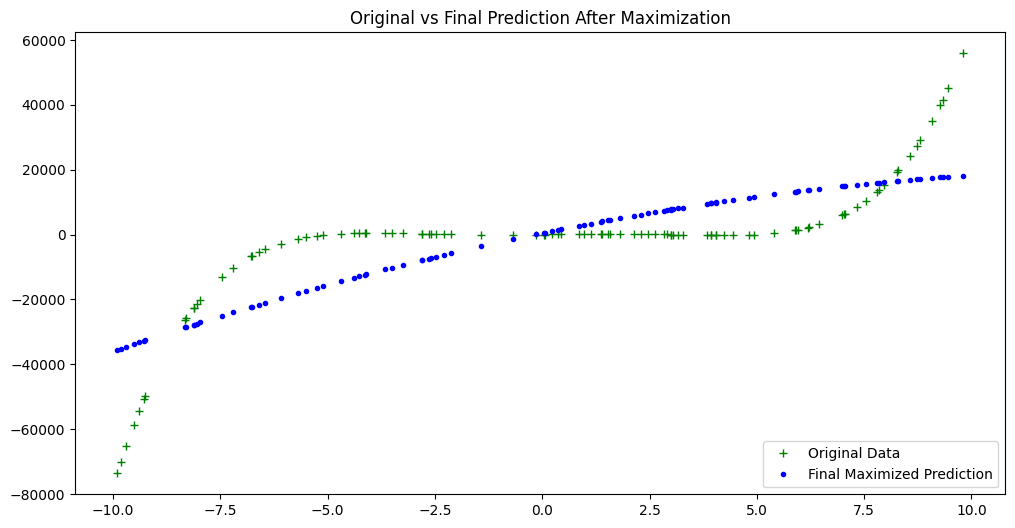

Final Coefficients for Maximization: (-93.05429663397098, 2714.520350589082, 433.56522532155907)


In [ ]:
def calc_gradient_2nd_poly_for_GD_maximization(coeffs, inputs_x, outputs_y, lr):
    """
    Calculates the gradient for a second-degree polynomial to find its maximum.
    Instead of subtracting the gradient for minimization, we add it for maximization.

    Args:
        coeffs: a, b, and c for a 2nd-degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Updated coefficients and loss after maximization step
    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x, y, y_bar in list(zip(inputs_x, outputs_y, y_bars)):  # Take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (2 / n) * sum(a_s)  # Use positive sign for maximization
    gradient_b = (2 / n) * sum(b_s)  # Use positive sign for maximization
    gradient_c = (2 / n) * sum(c_s)  # Use positive sign for maximization

    a_new = coeffs[0] + lr * gradient_a  # Move in the direction of the gradient for maximization
    b_new = coeffs[1] + lr * gradient_b  # Move in the direction of the gradient for maximization
    c_new = coeffs[2] + lr * gradient_c  # Move in the direction of the gradient for maximization

    new_model_coeffs = (a_new, b_new, c_new)

    # Update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar


def gradient_descent_maximization(epochs, lr):
    """
    Perform gradient descent for maximization (to find the maximum of a function).

    Args:
        epochs: number of iterations to perform of finding new coefficients and updating loss.
        lr: specified learning rate

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)
    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD_maximization(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)


# Example for running gradient descent maximization
GD_max = gradient_descent_maximization(30000, 0.0003)

# Plot the final prediction
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label='Original Data')
plt.plot(xs, GD_max[2], 'b.', label='Final Maximized Prediction')
plt.title('Original vs Final Prediction After Maximization')
plt.legend(loc="lower right")
plt.show()

# Print the final coefficients
print(f"Final Coefficients for Maximization: {GD_max[1]}")

## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

**1)**

In full batch gradient descent, the gradient is calculated using the entire training dataset. This means that, at each iteration, you compute the gradient and update the model parameters based on the full dataset. Since all the data points are used to compute the gradient, the model typically gets a very precise direction for the update at each iteration.

Since the gradient is calculated over the full dataset, shuffling isn't required to ensure correct gradient computation. The model will compute an accurate gradient regardless of data order.

If your data has some structure or order (like time-series data or grouped data), shuffling can sometimes improve convergence by eliminating any order-induced bias.

**2)**

Yes, my friend is right. Shuffling the training set before training is critical when using mini-batch gradient descent. It ensures that each mini-batch contains a mix of examples from both classes (dogs and cats), leading to better generalization, faster convergence, and improved overall training performance.

Without shuffling, the model might develop biases and fail to generalize well, which can hurt its ability to classify both classes effectively.